In [1]:
import csv
from csv import reader
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#The Dataset

The dataset we will use from kaggle:
[Google Play Store App](https://www.kaggle.com/lava18/google-play-store-apps)

Downloaded in personal compuer and uploading:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


#Converting into pandas dataframe

In [3]:
dataset=pd.read_csv('googleplaystore.csv')

#Exploring the dataset


In [4]:
dataset.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [5]:
def explore_dataset(dataset):
   row,colomn =  dataset.shape
   print( 'Row :',row)
   print( 'Colomn :', colomn)

In [6]:
explore_dataset(dataset)

Row : 10841
Colomn : 13


In [7]:
uniqueCategory = dataset['Category'].unique()

#Cleaning dataset

This dataset may have duplicate App. We will get rid of them.

In [8]:
cleanData=dataset.sort_values('Reviews',ascending=False).drop_duplicates('App',keep='first')
cleanData.reset_index(drop=True,inplace=True)
cleanData.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up


In [9]:
explore_dataset(cleanData)

Row : 9660
Colomn : 13


Here we saw that at first the dataset had `10841` row but after cleaning they have `9660` rows. SO we got rid  `1181` duplicate entries.

Now we will find the colomn with NULL value. 

In [10]:
cleanData.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We can see 1463 entries has NULL values as entries. 

In [11]:
nullRows = cleanData[cleanData['Rating'].isnull()]
nullRows.sort_values('Installs',ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5704,Young Speeches,LIBRARIES_AND_DEMO,NaN,2221,2.4M,"500,000+",Free,0,Everyone,Libraries & Demo,"January 8, 2017",1.1,2.3 and up
8793,EJ.by,NEWS_AND_MAGAZINES,NaN,10,2.3M,500+,Free,0,Everyone,News & Magazines,"October 27, 2015",1.2,4.0.3 and up
4503,Poteau BA,FAMILY,NaN,3,4.0M,500+,Free,0,Everyone,Education,"July 16, 2017",1.0.2,5.0 and up
1896,CD JUANITO,SPORTS,NaN,6,16M,500+,Free,0,Everyone,Sports,"October 26, 2017",6.0,4.1 and up
1900,F,TOOLS,NaN,6,4.9M,500+,Free,0,Everyone,Tools,"May 15, 2018",1.0.2,4.0 and up


Here we can see that apps with no reviews has low number of installs compared to top installed apps. SO we may delete apps with no reviews.

Now we will find all the rows with NULL value in any colomn.

In [12]:
nullRows=cleanData.isnull().sum(axis=1)
deleteRows = nullRows[nullRows!=0].index
print(deleteRows)

Int64Index([  74,  113,  118,  146,  148,  175,  270,  308,  309,  312,
            ...
            9650, 9651, 9652, 9653, 9654, 9655, 9656, 9657, 9658, 9659],
           dtype='int64', length=1470)


The deleteRows Variable has index of all the rows with NULL value in any colomn.
Now we will drop these rows. 

In [13]:
cleanData.drop(cleanData.index[deleteRows],inplace=True)

In [40]:
cleanData.reset_index(drop=True,inplace=True)

# Analysis of Clean Data

In [14]:
cleanData['Category'].unique()

array(['SPORTS', 'TOOLS', 'SHOPPING', 'TRAVEL_AND_LOCAL', 'FAMILY',
       'VIDEO_PLAYERS', 'COMMUNICATION', 'COMICS', 'GAME', 'MEDICAL',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'PRODUCTIVITY', 'EDUCATION',
       'EVENTS', 'PARENTING', 'PHOTOGRAPHY', 'LIFESTYLE', 'BUSINESS',
       'WEATHER', 'BOOKS_AND_REFERENCE', 'PERSONALIZATION',
       'HEALTH_AND_FITNESS', 'NEWS_AND_MAGAZINES', 'DATING', 'FINANCE',
       'ART_AND_DESIGN', 'BEAUTY', 'SOCIAL', 'MAPS_AND_NAVIGATION',
       'LIBRARIES_AND_DEMO', 'FOOD_AND_DRINK', 'HOUSE_AND_HOME'],
      dtype=object)

In [15]:
topCategory=cleanData['Category'].value_counts().head(10)
topCategory

FAMILY             1653
GAME                895
TOOLS               718
FINANCE             302
LIFESTYLE           301
PRODUCTIVITY        301
PERSONALIZATION     296
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: Category, dtype: int64

Visulizing number of apps according to category.

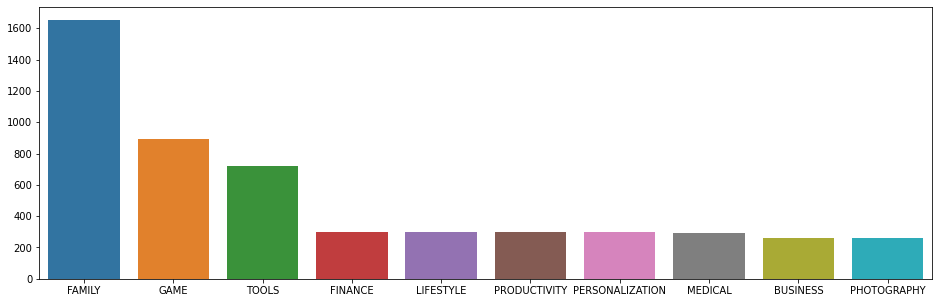

In [16]:
fig,ax=plt.subplots(figsize=(16,5))
ax=sns.barplot(topCategory.index,topCategory.values)

In [17]:
topGenres=cleanData['Genres'].value_counts().head(10)
topGenres

Tools              717
Entertainment      471
Education          429
Finance            302
Productivity       301
Lifestyle          300
Personalization    296
Action             292
Medical            290
Sports             266
Name: Genres, dtype: int64

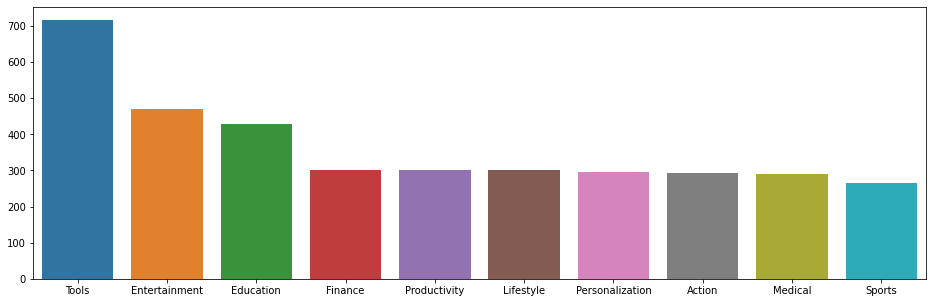

In [18]:
fig,ax=plt.subplots(figsize=(16,5))
ax=sns.barplot(topGenres.index,topGenres.values)

Here , we would like to visualize the other colomns.
We will do some type casting first to make visualization easier.

In [19]:
print(type(cleanData['Reviews'][0]))
print(cleanData['Reviews'].unique())

<class 'str'>
['9992' '999' '9975' ... '100' '10' '1']


In [20]:
rev=[]
for review in cleanData['Reviews']:
    intdata = int(review)
    rev.append(intdata)

    
cleanData['Reviews']=rev

In [21]:
print(type(cleanData['Reviews'][0]))
print(cleanData['Reviews'].unique())

<class 'numpy.int64'>
[9992  999 9975 ...  100   10    1]


In [22]:
cleanData.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


In [23]:
print(type(cleanData['Installs'][0]))
print(cleanData['Installs'].unique())

<class 'str'>
['1,000,000+' '100,000+' '500,000+' '50,000+' '10,000,000+' '5,000,000+'
 '10,000+' '50,000,000+' '100,000,000+' '5,000+' '1,000+' '1,000,000,000+'
 '500+' '100+' '10+' '50+' '500,000,000+' '5+' '1+']


In [24]:
intInstalls = []

for install in cleanData['Installs']:
  temp = install.replace('+','')
  temp = temp.replace(',','')
  temp = float(temp)
  intInstalls.append(temp)

cleanData['Installs']= intInstalls 

In [25]:
cleanData.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,GollerCepte Live Score,SPORTS,4.2,9992,31M,1000000.0,Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,100000.0,Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000.0,Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,1000000.0,Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,500000.0,Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


#Now we will find the top installed apps

In [26]:
topInstalls = cleanData.sort_values('Installs',ascending=False).head(10)
topInstalls

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8476,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1.000000e+09,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
1486,Instagram,SOCIAL,4.5,66577446,Varies with device,1.000000e+09,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
440,Google News,NEWS_AND_MAGAZINES,3.9,878065,13M,1.000000e+09,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
5191,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1.000000e+09,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
2718,Google+,SOCIAL,4.2,4831125,Varies with device,1.000000e+09,Free,0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
2863,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
96,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4006,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
7475,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+09,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
878,Facebook,SOCIAL,4.1,78158306,Varies with device,1.000000e+09,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


# Now we will try to have  some comparison based visulization

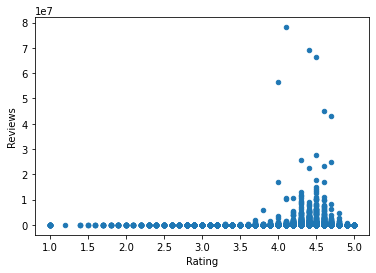

In [27]:
cleanData.plot.scatter('Rating','Reviews')

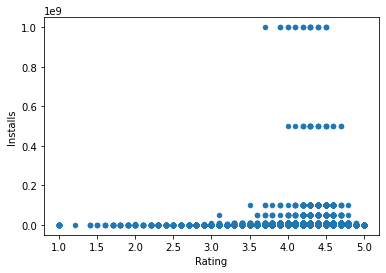

In [28]:
cleanData.plot.scatter('Rating','Installs')

#Summary:
Here we can see that apps which has ratings ranging from 3.5- 4.7 have been installed the most. The apps with ratings ranging from 4 - 5 have good reviews too.

#Most Populer Apps:
We can also see that most of the apps with most installs are mostly powered by Tech giants like Google, Facebook and Insta. 

#What developers tend to make:

The number of apps available in the playstore have mostly tools as genre and family as category. We can see that developer tends to make tools and entertainment related apps more than other categories. 
